In [138]:
import pandas as pd
from tabulate import tabulate

%reload_ext rpy2.ipython



In [139]:
%%R

install.packages('C50') 
library(C50)
library(rpart)
library(readr)


Loans_Training <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv")
Loans_Test <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/C50_0.1.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 305528 bytes (298 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [140]:
%%R

head(Loans_Training,10)

   Approval Debt.to.Income.Ratio FICO.Score Request.Amount Interest
1     FALSE                    0        397           1000      450
2     FALSE                    0        403            500      225
3     FALSE                    0        408           1000      450
4     FALSE                    0        408           2000      900
5     FALSE                    0        411           5000     2250
6     FALSE                    0        413           5000     2250
7     FALSE                    0        416           6000     2700
8     FALSE                    0        421           2000      900
9     FALSE                    0        422          12000     5400
10    FALSE                    0        432          10000     4500


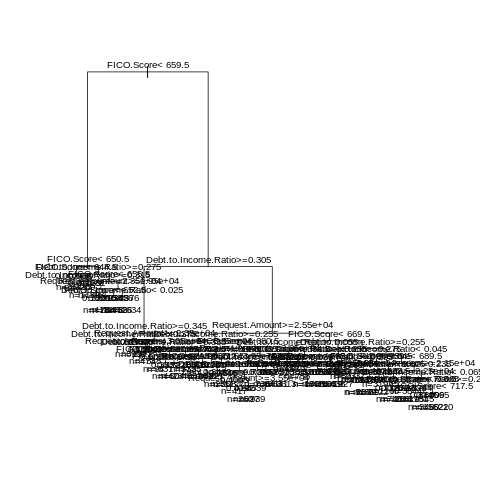

In [141]:
%%R

set.seed(123)
tree <- rpart(Approval ~ ., data = Loans_Training, control = rpart.control(cp = 0.0001))
plot(tree)
text(tree, cex = 0.8, use.n = TRUE, xpd = TRUE)

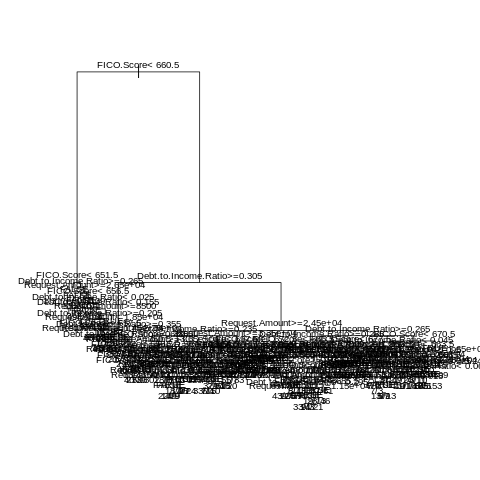

In [144]:
%%R

set.seed(123)
tree <- rpart(Approval ~ ., data = Loans_Test, control = rpart.control(cp = 0.0001))
plot(tree)
text(tree, cex = 0.8, use.n = TRUE, xpd = TRUE)

The first few splits of the training data are mainly determined by FICO.Score Debt.to.Income.Ratio, and Request.Amount. Same with the test data.

Work Cited : https://rpubs.com/minma/cart_with_rpart

 Factor w/ 2 levels "FALSE","TRUE": 1 1 1 1 1 1 1 1 1 1 ...


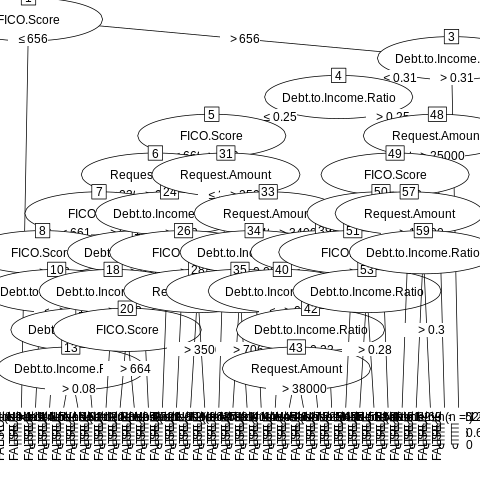

In [142]:
%%R

Loans_Training$Approval<-as.factor(Loans_Training$Approval)
str(Loans_Training$Approval)
model <- C5.0(Approval ~ ., data = Loans_Training)
plot(model)

 Factor w/ 2 levels "FALSE","TRUE": 1 1 1 1 1 1 1 1 1 1 ...


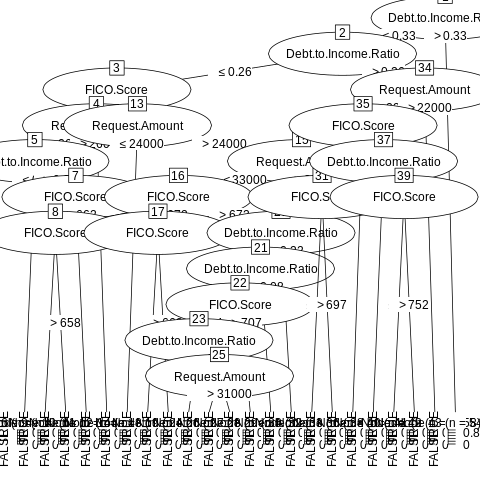

In [143]:
%%R

Loans_Test$Approval<-as.factor(Loans_Test$Approval)
str(Loans_Test$Approval)
model <- C5.0(Approval ~ ., data = Loans_Test)
plot(model)

Same as the CART model, the first few splits of the training set are mainly determined by FICO.Score Debt.to.Income.Ratio, and Request.Amount. The test data had more emphasis on Debt.to.Income.Ratio then any of the other models.

Work Cited : http://mercury.webster.edu/aleshunas/R_learning_infrastructure/Classification%20of%20data%20using%20decision%20tree%20and%20regression%20tree%20methods.html

Looking at the models, all of the besides the test c5 model had FICO be the most important factor followed by debt then Request. Only the last model had Debt be the most important factor.